# Import software libraries

In [2]:
import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib                      # Create 2D charts
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sns                  # Perform data visualization

# Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

Libraries used in this project:
- NumPy 1.16.2
- Pandas 0.24.2
- Matplotlib 3.0.3
- SciPy 1.2.1
- Scikit-learn 0.20.3
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]



# Load the dataset

In [3]:
# Load the dataset as a pandas DataFrame from ./seoul_bike_data/seoul_bike_data.csv
df=pd.read_csv('./seoul_bike_data/seoul_bike_data.csv')

df.head()

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


# Get acquainted with the dataset

In [4]:
# View data types and see if there are missing entries.
print(df.dtypes)

print(df.isnull().sum())

bikes_rented      int64
temp            float64
humidity          int64
wind_speed      float64
visibility        int64
dew_temp        float64
solar_rad       float64
rainfall        float64
snowfall        float64
dtype: object
bikes_rented    0
temp            0
humidity        0
wind_speed      0
visibility      0
dew_temp        0
solar_rad       0
rainfall        0
snowfall        0
dtype: int64


# Show example records

In [5]:
# View first 10 records.
df.head(10)

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0


# Examine a general summary of statistics

In [6]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.

df.describe()

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
count,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000
mean,731.374792,12.812009,58.074696,1.740481,1433.226590,3.964260,0.572427,0.149261,0.077949
std,643.616638,12.108977,20.483539,1.026341,609.803729,13.242399,0.870429,1.126075,0.445800
min,2.000000,-17.800000,0.000000,0.100000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,214.000000,3.100000,42.000000,1.000000,932.250000,-5.100000,0.000000,0.000000,0.000000
50%,546.000000,13.600000,57.000000,1.500000,1690.000000,4.800000,0.010000,0.000000,0.000000
75%,1088.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.940000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Look for columns that correlate with `bikes_rented`

In [7]:
# View the correlation values for each feature compared to the label.
corr_mat = df.corr()
corr_mat['bikes_rented'].sort_values(ascending=False)

bikes_rented    1.000000
temp            0.563440
dew_temp        0.401160
solar_rad       0.272748
visibility      0.213989
wind_speed      0.120961
rainfall       -0.128794
snowfall       -0.151881
humidity       -0.201466
Name: bikes_rented, dtype: float64

# Visually analyze cross correlations

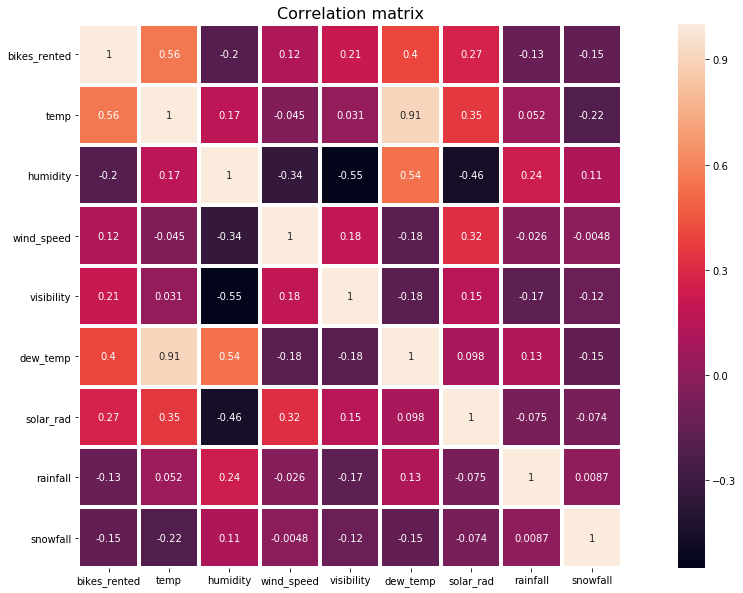

In [8]:
# Use Seaborn to plot the correlation matrix as a heatmap.
plt.figure(figsize=(20,10))

sns.heatmap(corr_mat, linewidths=3.0,  square = True, annot=True)

plt.title('Correlation matrix',fontsize=16)

plt.show()

# Use histograms to visualize the distribution of all features

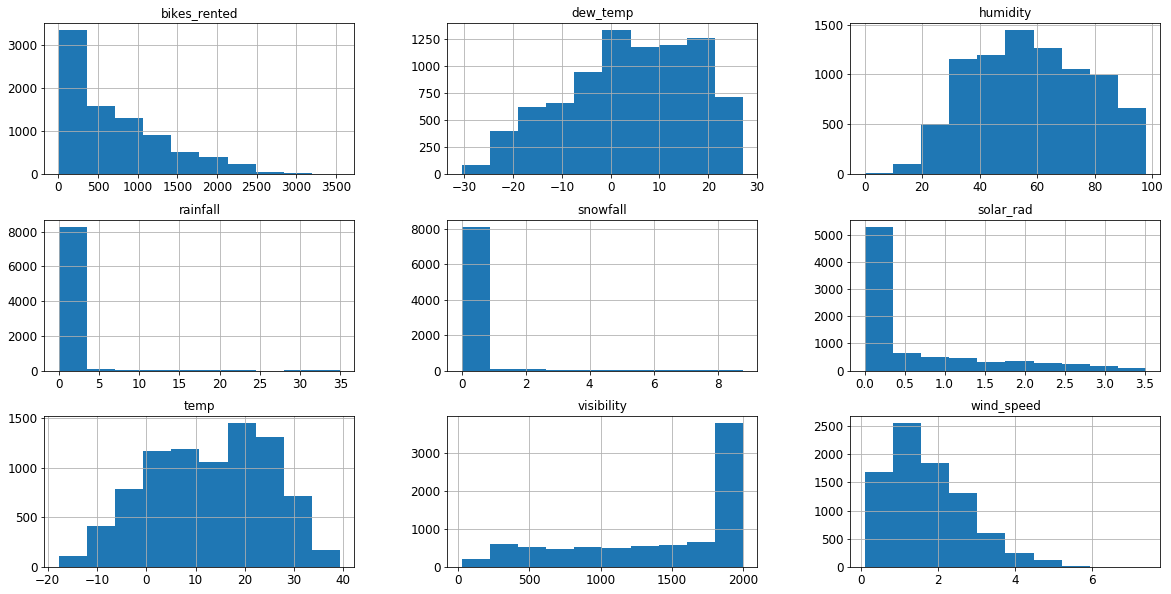

In [9]:
# Use Matplotlib to plot distribution histograms for all features.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

df.hist(figsize=(20,10))

plt.show()

# Split the data into training and testing sets and labels

In [10]:
from sklearn.model_selection import train_test_split

# Split the training and test datasets and their labels.
Y=df['bikes_rented']
X=df.drop(columns=['bikes_rented'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Compare the number of rows and columns in the original data to the training and test sets.

print(f"Original dataset: {df.shape}", '\n')

print(f'Training features:{x_train.shape}')
print(f'Training labels:{y_train.shape}')
print(f'Testing features:{x_test.shape}')
print(f'Testing labels:{y_test.shape}')

Original dataset: (8394, 9) 

Training features:(6715, 8)
Training labels:(6715,)
Testing features:(1679, 8)
Testing labels:(1679,)


# Build and test an initial linear regression model

In [11]:
from sklearn.linear_model import LinearRegression
from time import time
# Create a linear regression model.
lr=LinearRegression()

# Fit the model using training data and labels.
start=time()
lr.fit(x_train, y_train)
end=time()

train_time=(end-start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))

Model took 26.75 milliseconds to fit.


# Use the holdout dataset to test the model

In [12]:
# Print the regressor model's score using the test data and labels.
score = round((lr.score(x_test, y_test)*100),2) 
print(f'R^2 of the model is {score}%')

R^2 of the model is 44.36%


# Compare the first ten predictions to actual values

In [20]:
# Make predictions on the test set.
predicted = lr.predict(x_test)

comparing = pd.DataFrame(predicted, columns=['predicted values'])
comparing['actual values'] = y_test.reset_index(drop=True)

comparing.head(10)

,predicted values,actual values
0,82.528285,328
1,1156.071911,1058
2,517.007936,273
3,813.263484,1037
4,1079.153589,2378
5,844.249676,695
6,123.496310,170
7,-59.803804,322
8,444.626422,321
9,843.559925,670


# Identify outliers

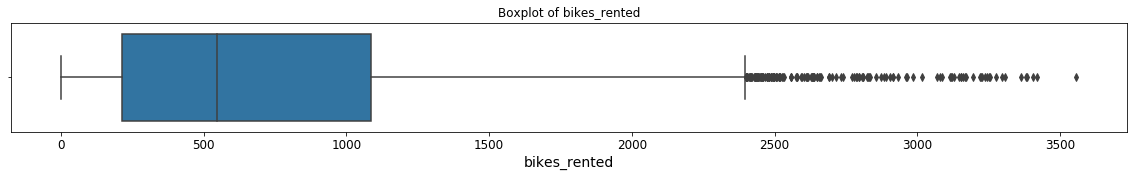

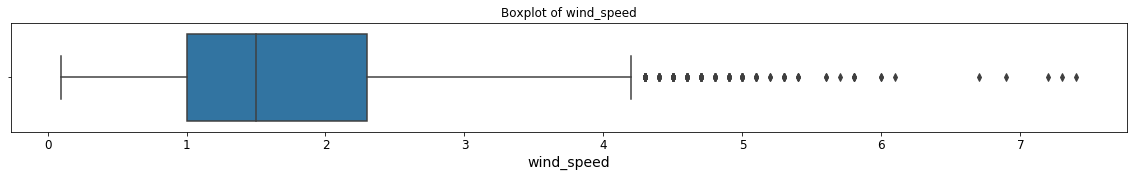

In [21]:
# Use Matplotlib to create box plot distributions for bikes rented and wind speed.
for var in df[['bikes_rented', 'wind_speed']]:
    plt.figure(figsize=(20,2))
    sns.boxplot(x=df[var], orient="h")
    plt.title(f'Boxplot of {var}')
    plt.show()

# Examine data values in the outliers

In [22]:
# Show rows that exceed 3,500 bikes rented.
df.loc[df['bikes_rented']>3500]

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
4743,3556,24.1,57,2.9,1301,15.0,0.56,0.0,0.0


In [23]:
# Show rows with wind speed greater than 6 meters per second.
df.loc[df['wind_speed']> 6]

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
909,146,0.7,77,6.7,692,-2.8,0.0,0.9,1.0
3108,913,21.2,35,7.4,1992,5.1,1.8,0.0,0.0
3112,1805,19.7,52,7.2,2000,9.5,0.2,0.0,0.0
3114,336,19.1,58,6.1,2000,10.6,0.0,0.0,0.0
3115,133,17.5,70,7.3,1634,11.9,0.0,0.5,0.0
6230,49,25.3,70,6.9,925,19.4,0.0,0.4,0.0


# Drop outliers from the training dataset

In [24]:
# Keep only the rows where number of bikes rented is less than 3,500.
# Keep only the rows where the wind speed is less than 6 m/s.

clean_df = df[(df['wind_speed'] < 6) & (df['bikes_rented']<3500)]
print(f'The shape of clean data:{clean_df.shape}')

The shape of clean data:(8385, 9)


# Compare the scale and distribution of `bikes_rented` and `wind_speed`

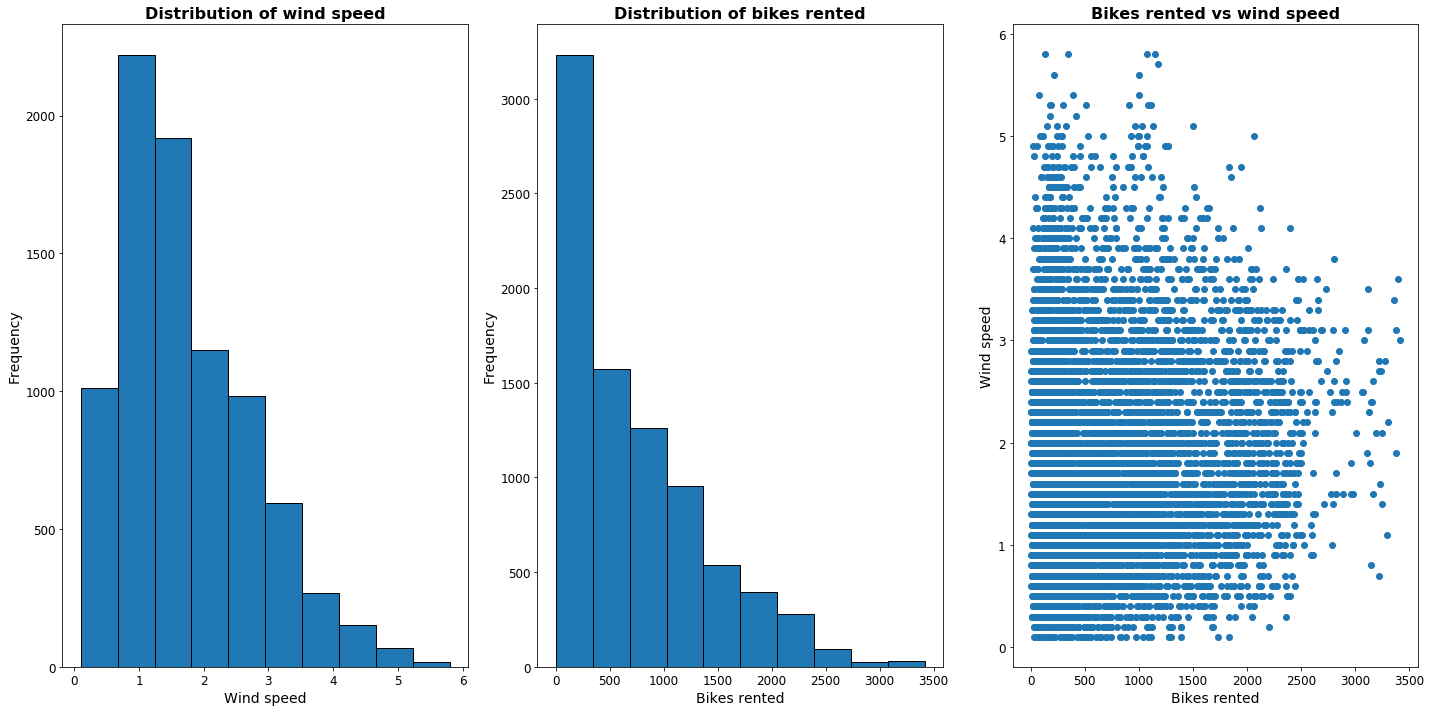

In [25]:
# Define a function that uses Matplotlib to visually compare the scale and distribution of bikes rented and wind speed.
def distribution_and_scatter():
    fig, axes = plt.subplots(1, 3, figsize=(20,10))
    
    axes[0].hist(clean_df['wind_speed'], edgecolor='black')
    axes[0].set_title('Distribution of wind speed', fontweight ='bold', fontsize=16)
    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel('Wind speed')
    
    axes[1].hist(clean_df['bikes_rented'], edgecolor='black')
    axes[1].set_title('Distribution of bikes rented', fontweight ='bold', fontsize=16)
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel('Bikes rented')
    
    axes[2].scatter(clean_df['bikes_rented'], clean_df['wind_speed'],)
    axes[2].set_title('Bikes rented vs wind speed', fontweight ='bold', fontsize=16)
    axes[2].set_ylabel('Wind speed')
    axes[2].set_xlabel('Bikes rented')
    
    plt.tight_layout()
    plt.show()

# Call the function. 
distribution_and_scatter()

# Transform `bikes_rented` and `wind_speed`, and compare results

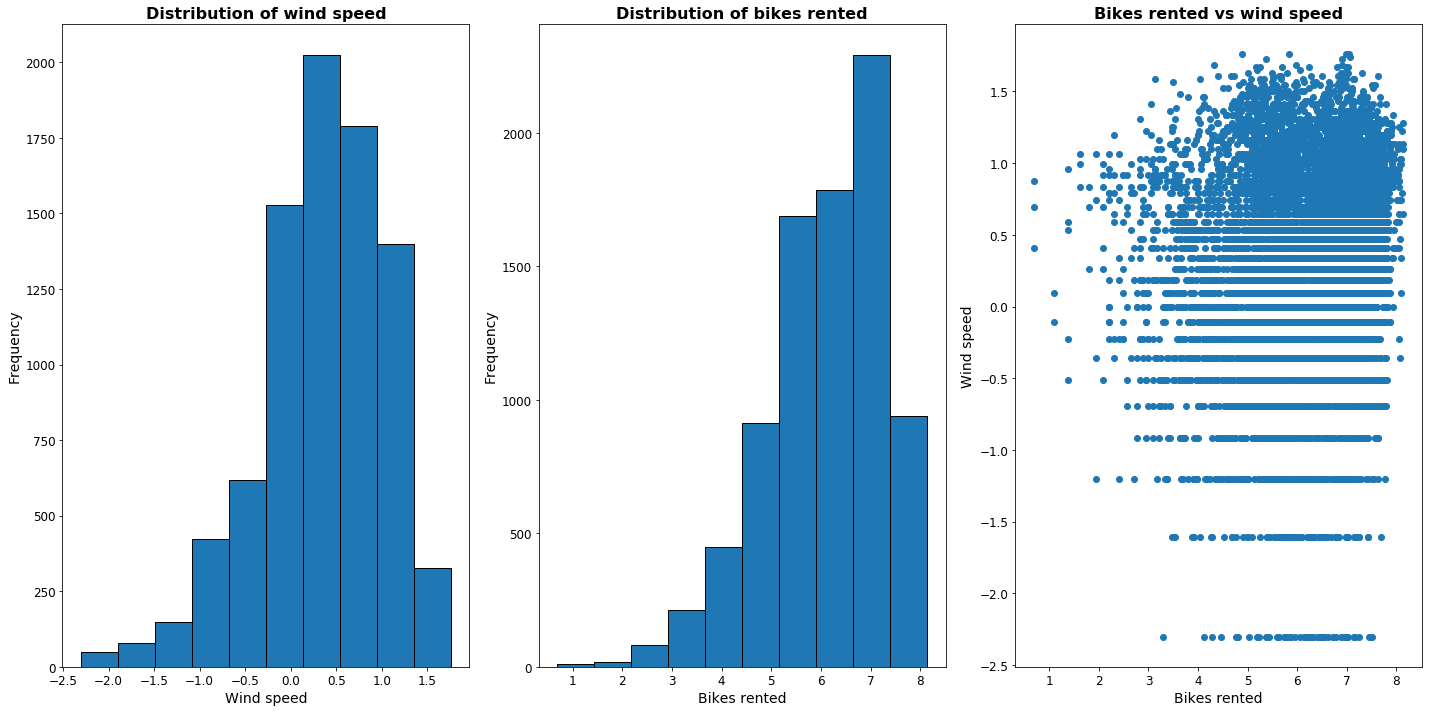

In [26]:
# Apply a log transformation (np.log) to scale bikes rented and wind speed.
clean_df['wind_speed'] = np.log(clean_df['wind_speed'])
clean_df['bikes_rented'] =np.log(clean_df['bikes_rented'])
# Compare scale and distribution of bikes rented and wind speed by calling the function you defined earlier.
distribution_and_scatter()

# Build and test a new linear regression model

In [44]:
# Create aa linear regression model and fit it using the transformed training dat.

Y =np.array(clean_df['bikes_rented'].copy())
X = np.array(clean_df.drop(columns = 'bikes_rented'))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


start = time()
new_lr=LinearRegression().fit(x_train, y_train)
end = time()
train_time=(end-start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))

# Print the regressor model's score using the test data and labels.
score = new_lr.score(x_test, y_test) * 100
print(f"R^2 of the model is:{round(score, 2)}%")

Model took 1.51 milliseconds to fit.
R^2 of the model is:44.14%


# Compare the first ten predictions to actual values for the new model

In [45]:
# Make predictions on the test set.
new_predicted = new_lr.predict(x_test)

comparing2 = pd.DataFrame(new_predicted, columns=['Predicted values'])
comparing2['Actual values'] = y_test

# View examples comparing actual bike rentals to predicted bike rentals.
comparing2.head()

,Predicted values,Actual values
0,6.960547,7.230563
1,5.719286,7.421178
2,6.752452,6.144186
3,7.220788,7.777793
4,6.161710,6.895683


# Convert the bike rentals back to their initial scale

In [47]:
# Call math.exp to convert bikes rented back to their initial scale.
import math

comparing2 = comparing2.applymap(math.exp)
# View examples comparing actual bike rentals to predicted bike rentals.
comparing2.head(10)

,Predicted values,Actual values
0,1054.210413,1381.0
1,304.687367,1671.0
2,856.155645,466.0
3,1367.566453,2387.0
4,474.238207,988.0
5,450.642205,306.0
6,240.564296,122.0
7,258.553342,264.0
8,1488.446580,582.0
9,1148.574797,1612.0
